<a href="https://colab.research.google.com/github/farzin23i/PyML-SpringSchool2021/blob/main/Workshop2/PMLSC21_210422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References to see more on these topics

If you don't want to code alot, and are more interested in theories and mathematics: <br>
https://www.coursera.org/learn/machine-learning#syllabus ,<br>
suggestion to you all: attend at least in the first 3 weeks.

If you are interested in coding and want to know alot things, not very deep: <br>
https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/

Standard courses and videos with both coding and details: <br>
https://pythonprogramming.net/

# Linear Regression


<center><img src='https://drive.google.com/uc?id=1oB75mQ8c9O8hxKKwGEABgJPj0iT-pHug' height=400/></center>


<p>How to find the best parameters &theta; for h<sub>&theta;</sub>(x) :</p> 

<img src='https://drive.google.com/uc?id=1ja4wQZJk0a2-iL9ZRkTJ2dHfq6OMermv' width=500/>

<img src='https://drive.google.com/uc?id=1KP6zV7AbmbbqKBs1USJOHahmLddXA-ZK' width=500/>

<img src='https://drive.google.com/uc?id=13RTLSmuFETNtj3Zp-L6iIMfqLG_btY_T' width=500/>

## code to make it 

In [ ]:
import numpy as np
import pylab as plt 
import pandas as pd

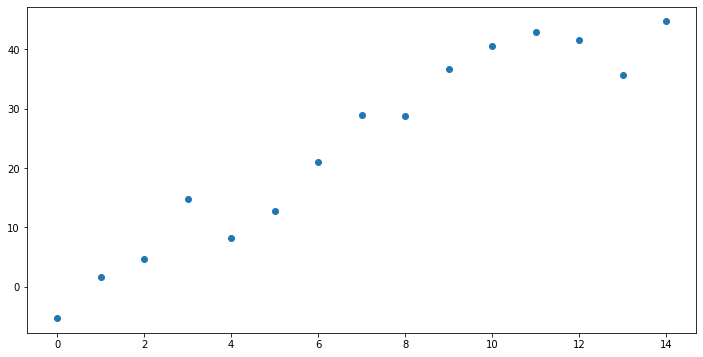

In [ ]:
# First we build a little dataset:
X= np.arange (15)
y_n = 3.4*X + 1.8 + 6*np.random.normal(size=len(X))

plt.figure(figsize=[12,6])
plt.plot (X, y_n, 'o')

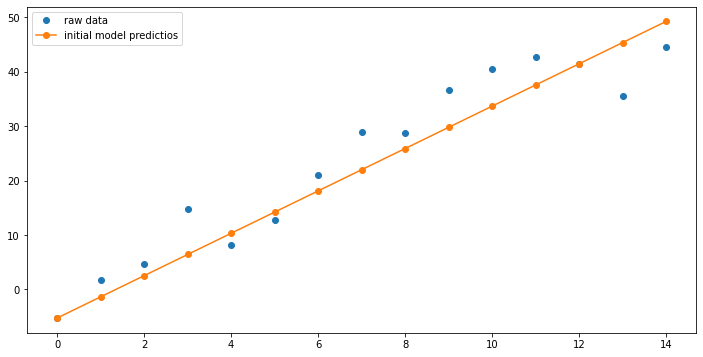

In [ ]:
# We have to initialize the parameters.
# in this way:
a= (y_n[12]-y_n[0]) / (X[12]-X[0])
b= y_n[0]
# # or:
# a= 1
# b= 1
h= a*X + b

plt.figure(figsize=[12,6])
plt.plot (X, y_n, 'o', label= 'raw data')
plt.plot (X, h, 'o-', label= 'initial model predictions')
plt.legend()

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac {1}{2m}\sum_{i=1}^m(h(x_i)-\hat{y}_i)^2$$

In [ ]:
# The cost function
J = sum((h - y_n)**2) / (2*len(X))
J

13.095204148374357

$$ h(x_i) = a * x_i + b$$

In [ ]:
alpha = 5e-3        # learning rate 
history_J = [J]     # to have the learning curve 

diff = 10
while diff>1e-5:
# for i in range (10):
    a_p = a - alpha*sum((a*X + b - y_n)*X) / len(X)
    b_p = b - alpha*sum((a*X + b - y_n)) / len(X)

    a= a_p
    b= b_p
    J_p = sum((a*X + b - y_n)**2) / (2*len(X))
    diff = abs(history_J[-1] - J_p)

    history_J.append (J_p)


Text(0, 0.5, 'Loss')

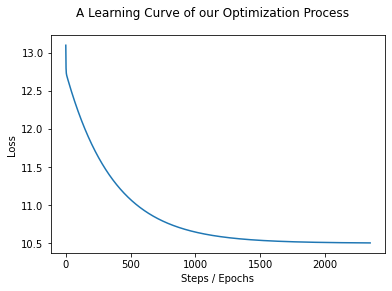

In [ ]:
plt.plot (history_J)
plt.suptitle ('A Learning Curve of our Optimization Process')
plt.xlabel ('Steps / Epochs')
plt.ylabel ('Loss')

Everything looks good. The image below can be a good reference to address suitability of learning process: <br>

<center><img src='https://drive.google.com/uc?id=1UPoseluBGV6-7rzkwc2mCtgHIy16A075' width=400/></center>


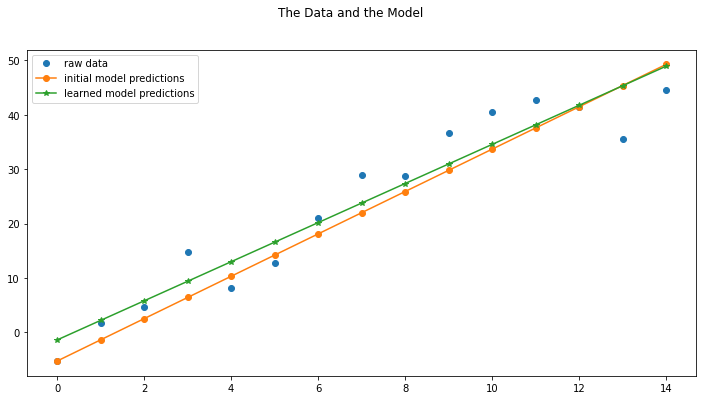

In [ ]:
plt.figure(figsize=[12,6])

plt.plot (X, y_n, 'o', label= 'raw data')
plt.plot (X, h, 'o-', label= 'initial model predictions')
plt.plot (X, a*X+b, '*-', label= 'learned model predictions')

plt.suptitle ('The Data and the Model')
plt.legend()

## use Sci-kit learn

In [ ]:
from sklearn.linear_model import LinearRegression

### an example from sklearn documentation

In [ ]:
X1 = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
X1

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [ ]:
y1 = np.dot(X1, np.array([2.5, 3.8])) + 3
y1

array([ 9.3, 13.1, 15.6, 19.4])

In [ ]:
model = LinearRegression().fit(X1, y1)

In [ ]:
model.coef_

array([2.5, 3.8])

In [ ]:
model.intercept_

3.0000000000000053

In [ ]:
X_test = [[5,8], [50,30]]
y_test = [ 45.9, 242. ]

model.score (X_test, y_test)

1.0

In [ ]:
model.predict ([[5,8], [50,30]])

array([ 45.9, 242. ])

## house dataset

In [ ]:
df = pd.read_csv ('/content/sample_data/california_housing_train.csv')
df.head ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
X_train = df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,17.0,720.0,174.0,333.0,117.0,1.6509
3,14.0,1501.0,337.0,515.0,226.0,3.1917
4,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
y_train = df['median_house_value']

In [ ]:
lm = LinearRegression()
lm.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
df_test = pd.read_csv ('/content/sample_data/california_housing_test.csv')
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
X_test = df_test[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]

y_test = df_test['median_house_value']

In [ ]:
lm.score (X_test, y_test)

0.5458835346746116

This is not a good score, bcs our data shoud be preprocessed.

In [ ]:
lm.coef_

array([ 1.88001408e+03, -1.99559207e+01,  9.95247716e+01, -3.50182347e+01,
        1.27225320e+02,  4.80334593e+04])

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X_data.columns,columns=['Coefficient'])
coeff_df

,Coefficient
housing_median_age,1880.014083
total_rooms,-19.955921
total_bedrooms,99.524772
population,-35.018235
households,127.225320
median_income,48033.459277


# Logistic Regression
